In [1]:
%pylab inline
from datetime import date
from app import create_app
from app.instrument import Instrument
from app.analysis import Quote
mappings= {'BRK.B': 'BRK-B'}
with create_app().app_context():
    provided = ['MUB', 'PGX', 'VNQ', 'SPLV']
    quote = Quote([b.symbol if b.symbol not in mappings else mappings[b.symbol]
                   for b in Instrument.find_stocks(100)] + provided, 100)
f'from {quote.start.date()} to {date.today()}'

Populating the interactive namespace from numpy and matplotlib


'from 2019-02-25 to 2019-06-04'

In [2]:
stat = quote.statistics(21)
stat = stat[(stat['drawdown'] < 12) & (stat['21-mean'] > 1.2)]
stat

,21-len,21-mean,21-std,21-shrp,drawdown
Symbols,,,,,
KO,49,3.392115,1.214356,2.651021,3.383611
SHOP,49,14.819562,9.662693,1.515802,6.171438
ZNGA,49,7.029591,4.727509,1.450396,4.700161
NTDOY,49,10.337268,7.118377,1.427915,7.386100
SPLV,49,1.476678,0.945659,1.378768,1.971361
SBUX,49,3.952139,2.792942,1.353163,4.600183
PYPL,49,4.921761,3.642773,1.303657,7.332929
V,49,3.188678,2.369126,1.272978,4.317938
ENPH,49,25.780874,20.243454,1.265004,6.875388


In [4]:
quote.setup_mask([*stat.index, *provided])
quote.least_correlated_portfolio(21, 6, provided)

['MUB', 'PGX', 'VNQ', 'SPLV', 'KO', 'SHOP'] 7.406430118774164 13.146107349429723 5.773508304785777 -11.513185535441334
['MUB', 'PGX', 'VNQ', 'SPLV', 'SHOP', 'ZNGA'] 6.203686116456575 10.413600819966856 6.102645779814783 -10.312560483325063
['MUB', 'PGX', 'VNQ', 'SPLV', 'SHOP', 'NTDOY'] 4.486681322388607 8.002630380738605 6.774130483248827 -10.290079541598825
['MUB', 'PGX', 'VNQ', 'SPLV', 'SHOP', 'DIS'] 3.8032689657062484 6.948726564961957 6.460624645419577 -9.606082244675285
['MUB', 'PGX', 'VNQ', 'SPLV', 'SHOP', 'WMT'] 3.5370267222144154 7.287415305168892 5.7634070595142735 -9.51379564246875


['MUB', 'PGX', 'VNQ', 'SPLV', 'SHOP', 'WMT']

In [5]:
quote.setup_mask([*stat.index, *provided])
quote.least_correlated_portfolio(21, 6, provided + ['NTDOY'])

['MUB', 'PGX', 'VNQ', 'SPLV', 'NTDOY', 'KO'] 8.61863083238925 13.966755220290455 6.077173788329992 -11.425298176231195
['MUB', 'PGX', 'VNQ', 'SPLV', 'NTDOY', 'SHOP'] 4.486681322388607 8.002630380738605 6.774130483248827 -10.290079541598825


['MUB', 'PGX', 'VNQ', 'SPLV', 'NTDOY', 'SHOP']

In [6]:
quote.setup_mask(['NTDOY', 'SHOP'])
quote.find_optimal_ratio(21, 10)

/Users/chaoyi/.local/share/virtualenvs/portfolio_analysis-bdMx2S3t/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


(Symbols
 NTDOY    0.680901
 SHOP     0.319099
 dtype: float64, 11.7676, 6.2156)

,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
Portfolio,49.0,11.722957,6.214594,2.488532,6.184793,9.305878,17.072381,24.444357,1.858548,5.376336
SHOP,49.0,14.819562,9.662693,1.781530,7.402646,11.095560,23.570355,36.338890,1.515802,6.171438
NTDOY,49.0,10.337268,7.118377,-1.587664,4.443372,9.850290,15.122880,27.448683,1.427915,7.386100


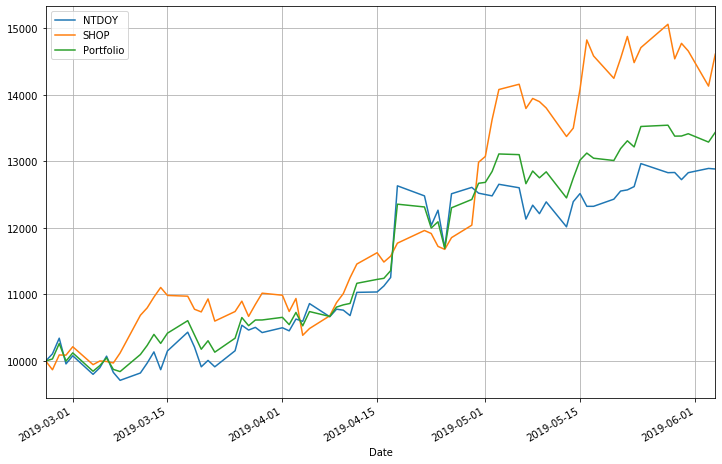

In [7]:
quote.graph(21, {'NTDOY': .68, 'SHOP': .32})